In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')


In [2]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 결측치 확인

In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### columns

In [4]:
df['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

type columns
- 영화: 0
- 티비쇼: 1

In [5]:
def type_col(col):
    if col == 'Movie':
        return 0
    else:
        return 1
    

In [6]:
df['type'] = df["type"].apply(type_col)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,1,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,1,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,1,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,0,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,1,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,0,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,0,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


rating col
- 전체관람가('G', 'PG', 'TV-Y', 'TV-7', 'TV-Y7-FV', 'TV-G'): 0
- 12,15세 관람가('PG-13', 'TV-PG', 'TV-14'): 1
- 15, 청불('R', 'NC-17', 'NR', 'UR', 'TV-MA'): 2 

In [7]:
def rating_col(col):
    if col in ['G', 'PG', 'TV-Y','TV-Y7', 'TV-Y7-FV', 'TV-G']:
        return 0
    elif col in ['PG-13', 'TV-PG', 'TV-14']:
        return 1
    elif col in ['R', 'NC-17', 'NR', 'UR', 'TV-MA']:
        return 2
    else:
        return col

In [8]:
df['rating'] = df["rating"].apply(rating_col)
df['rating']

0       1
1       2
2       2
3       2
4       2
       ..
8802    2
8803    0
8804    2
8805    0
8806    1
Name: rating, Length: 8807, dtype: object

duration컬럼에서 rating으로 밀린 항목 원래대로 복구

In [9]:
df[df['rating'] == '74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,0,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [10]:
df[df['rating'] == '66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,0,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
df[df['rating'] == '84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,0,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [12]:
index = df[df['rating'] == '66 min'].index 
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '74 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '84 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

#index = df[df['rating']=='66 min'].index 
#df.loc[index,col[8:10]] = df.loc[index,col[8:10]].shift(1,axis=1)

#df.loc[df['rating'] =='66 min',col[8:10]] = df.loc[df['rating'] =='66 min',col[8:10]].shift(1,axis=1)

In [13]:
df['rating'].unique()

array([1, 2, 0, nan], dtype=object)

duration col


In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
# min 열만 가져오기
duration_col = df['duration'].str.endswith('min')

In [16]:
df[duration_col]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,1,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,0,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,0,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,2,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,0,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,1,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,0,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,2,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,0,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,2,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,0,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,2,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,0,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,2,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,0,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,0,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


(array([1731., 1439., 1163.,  587.,  421.,  305.,  249.,  107.,   67.,
          62.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

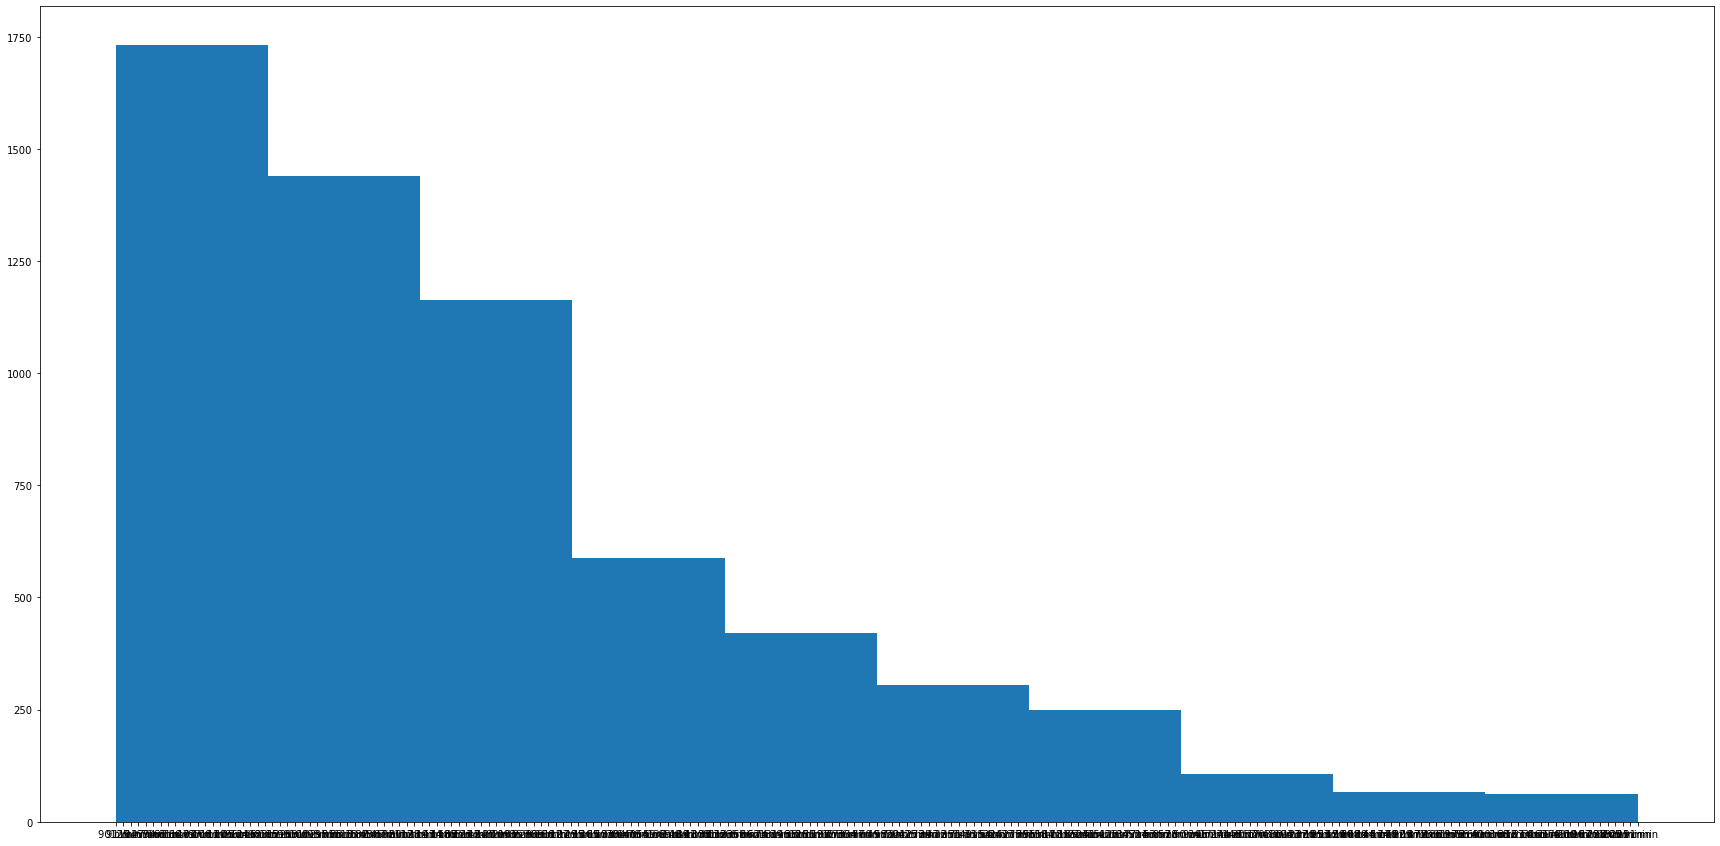

In [17]:
plt.figure(figsize=(30,15))
plt.hist(df[duration_col]['duration'])

([<matplotlib.axis.XTick at 0x280fc2f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

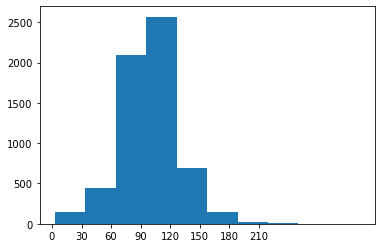

In [20]:
aa =df.loc[df['duration'].str.endswith('min'),'duration'] 
aa = [int(x[:-4]) for x in aa] 
plt.hist(aa) 
plt.xticks([0,30,60,90,120,150,180,210]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x281046a00>,
 'caps': [<matplotlib.lines.Line2D at 0x281068190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2802e7d00>],
 'medians': [<matplotlib.lines.Line2D at 0x281068670>],
 'fliers': [<matplotlib.lines.Line2D at 0x281068970>],
 'means': []}

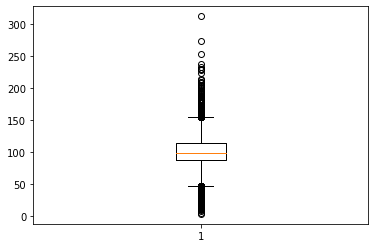

In [21]:
plt.boxplot(aa)

In [22]:
# listed_in columns을 중복제거 후 ','로 split해서 딕셔너리에 저장
# 장르별 duration 확인
listin = df['listed_in'].dropna().unique()

listin_list = []
for x in listin:
    list_1 = x.split(',')
    for y in list_1:
        if y.strip() in listin_list:
            continue
        else:
            listin_list.append(y.strip())
listin_list
df['listed_in']  = df['listed_in'].apply(lambda x: x.split(','))

bb = {x:[] for x in listin_list}
for x in range(len(df)):
   for y in df['listed_in'][x]:
       bb[y.strip()].append(df['duration'][x])

In [37]:
bb

{'Documentaries': ['90 min',
  '67 min',
  '23 min',
  '113 min',
  '96 min',
  '92 min',
  '97 min',
  '80 min',
  '94 min',
  '89 min',
  '83 min',
  '86 min',
  '93 min',
  '86 min',
  '82 min',
  '70 min',
  '86 min',
  '78 min',
  '90 min',
  '70 min',
  '69 min',
  '97 min',
  '102 min',
  '97 min',
  '114 min',
  '81 min',
  '85 min',
  '100 min',
  '93 min',
  '96 min',
  '100 min',
  '93 min',
  '93 min',
  '38 min',
  '39 min',
  '83 min',
  '97 min',
  '89 min',
  '89 min',
  '104 min',
  '273 min',
  '84 min',
  '82 min',
  '97 min',
  '36 min',
  '61 min',
  '74 min',
  '58 min',
  '72 min',
  '99 min',
  '109 min',
  '73 min',
  '29 min',
  '91 min',
  '87 min',
  '101 min',
  '64 min',
  '85 min',
  '97 min',
  '109 min',
  '95 min',
  '58 min',
  '76 min',
  '141 min',
  '65 min',
  '75 min',
  '71 min',
  '84 min',
  '55 min',
  '86 min',
  '75 min',
  '83 min',
  '98 min',
  '93 min',
  '21 min',
  '87 min',
  '90 min',
  '51 min',
  '100 min',
  '87 min',
  '101 min'

In [36]:
# season, min 혼용된 listed_in 확인 
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) != any([x.endswith('min') for x in bb[i]]):
        print(i)

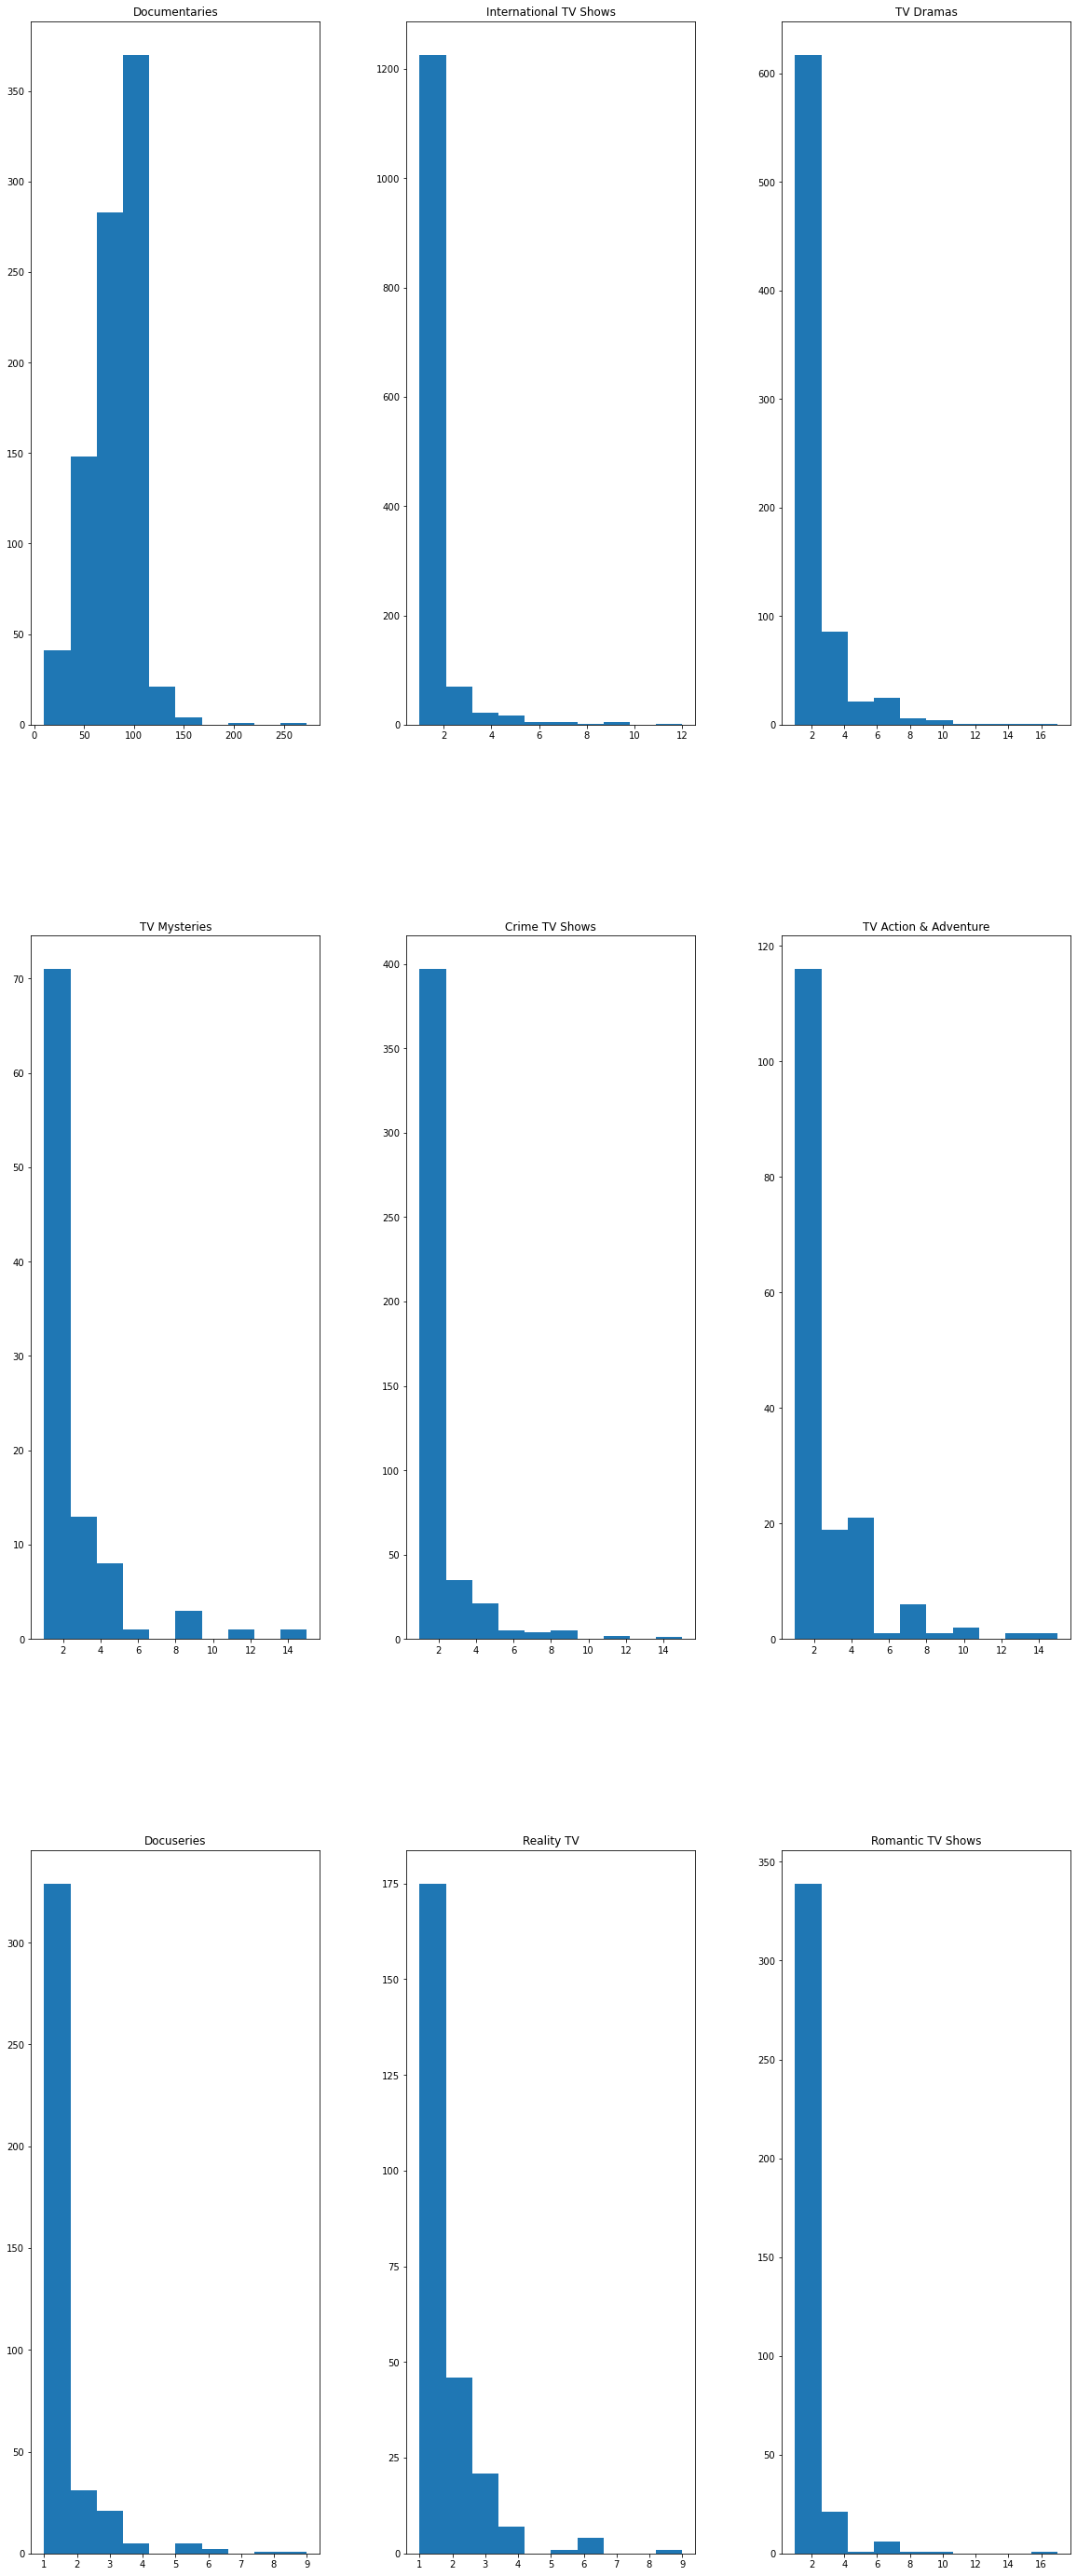

In [48]:
count=0
min_gen=[]
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) == True:
        count+=1
        min_gen.append(i)


fig,ax = plt.subplots(3,3,figsize =(20,50))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.3)

len(bb)
j=0
for i in bb:
    if j==9:break
    hist_data = [int(x.split(' ')[0]) for x in bb[i]]
    ax[j//3,j%3].hist(hist_data)
    ax[j//3,j%3].set_title(i)

    j+=1